In [1]:
from icecap.infrastructure.memory_manager import get_memory_manager
from icecap.infrastructure.process import get_wow_process_id
from icecap.infrastructure.driver import GameDriver
from icecap.infrastructure.repository import PlayerRepository
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np

%matplotlib widget

In [2]:
memory_manager = get_memory_manager(get_wow_process_id())
driver = GameDriver(memory_manager)
player_repository = PlayerRepository(driver)

In [7]:
local_player = player_repository.get_local_player()

In [8]:
# Get initial position
initial_position = player_repository.refresh_player(local_player).position

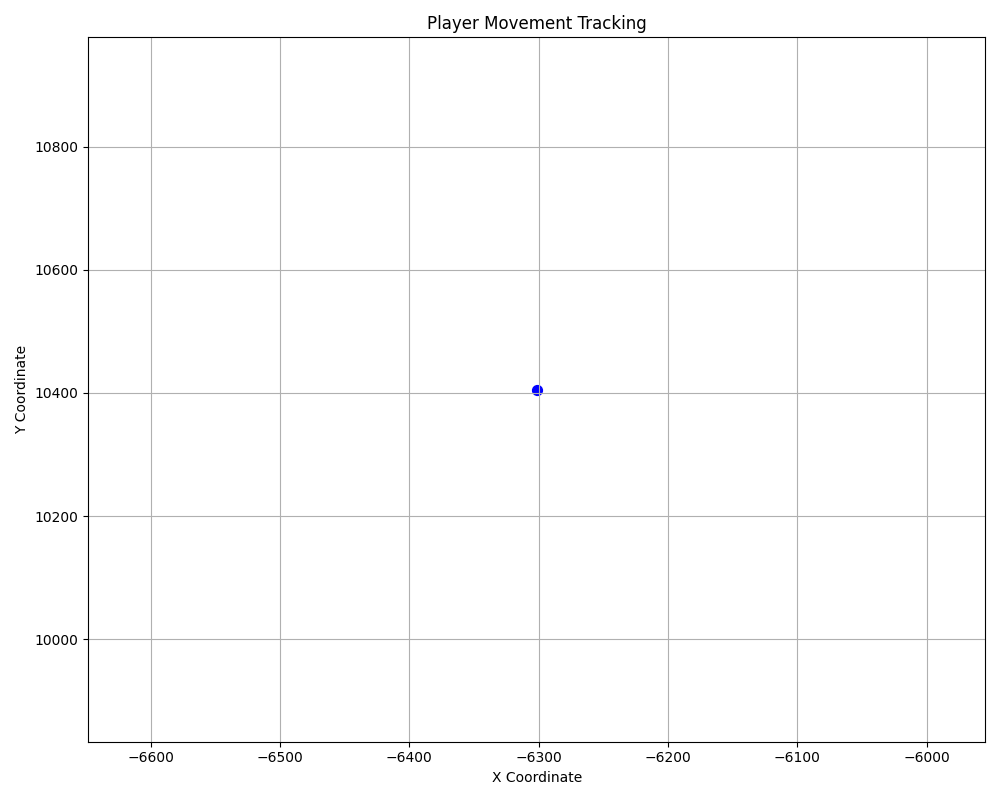

In [9]:
# Set up the plot
fig = plt.figure(figsize=(10, 8))
ax = plt.subplot(111)
ax.set_title('Player Movement Tracking')
ax.set_xlabel('X Coordinate')
ax.set_ylabel('Y Coordinate')
ax.grid(True)

# Initialize position history lists
x_positions = [initial_position.x]
y_positions = [initial_position.y]

# Create a scatter plot for the current position
scatter = ax.scatter(x_positions, y_positions, c='blue', s=50)
# Create a line plot for the movement path
line, = ax.plot(x_positions, y_positions, 'r-')

def update_plot(frame):
    refreshed_player = player_repository.refresh_player(local_player)
    current_position = refreshed_player.position

    x_positions.append(current_position.x)
    y_positions.append(current_position.y)

    scatter.set_offsets(np.column_stack([x_positions[-1], y_positions[-1]]))

    line.set_data(x_positions, y_positions)

    ax.relim()
    ax.autoscale_view()

    return scatter, line

def frames_generator():
    frame_number = 0
    while True:
        yield frame_number
        frame_number += 1

ani = FuncAnimation(fig, update_plot, interval=100, frames=frames_generator(), save_count=100, blit=False)
plt.tight_layout()